In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
Data_PCA_sim= pd.read_csv("DATA_PCA_sim.csv")
keys=Data_PCA_sim.keys()[1:7]
X=Data_PCA_sim[keys].values
Y=Data_PCA_sim['Class'].values
print(X.shape)
print(Y.shape)

(2079, 6)
(2079,)


#One-vs-All

In [3]:
Y_OvA = label_binarize(Y, classes=np.arange(0, max(Y)))
n_classes = Y_OvA.shape[1]

In [4]:
random_state = np.random.RandomState(0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_OvA, random_state=0, test_size=0.5)

In [6]:
classifier =  OneVsRestClassifier(
    svm.SVC(kernel='rbf', C=10,gamma=0.1, probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

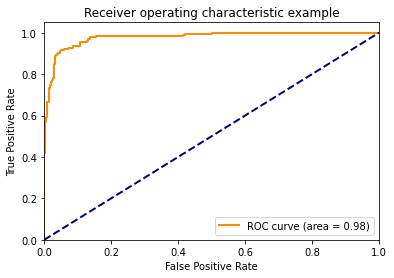

In [7]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


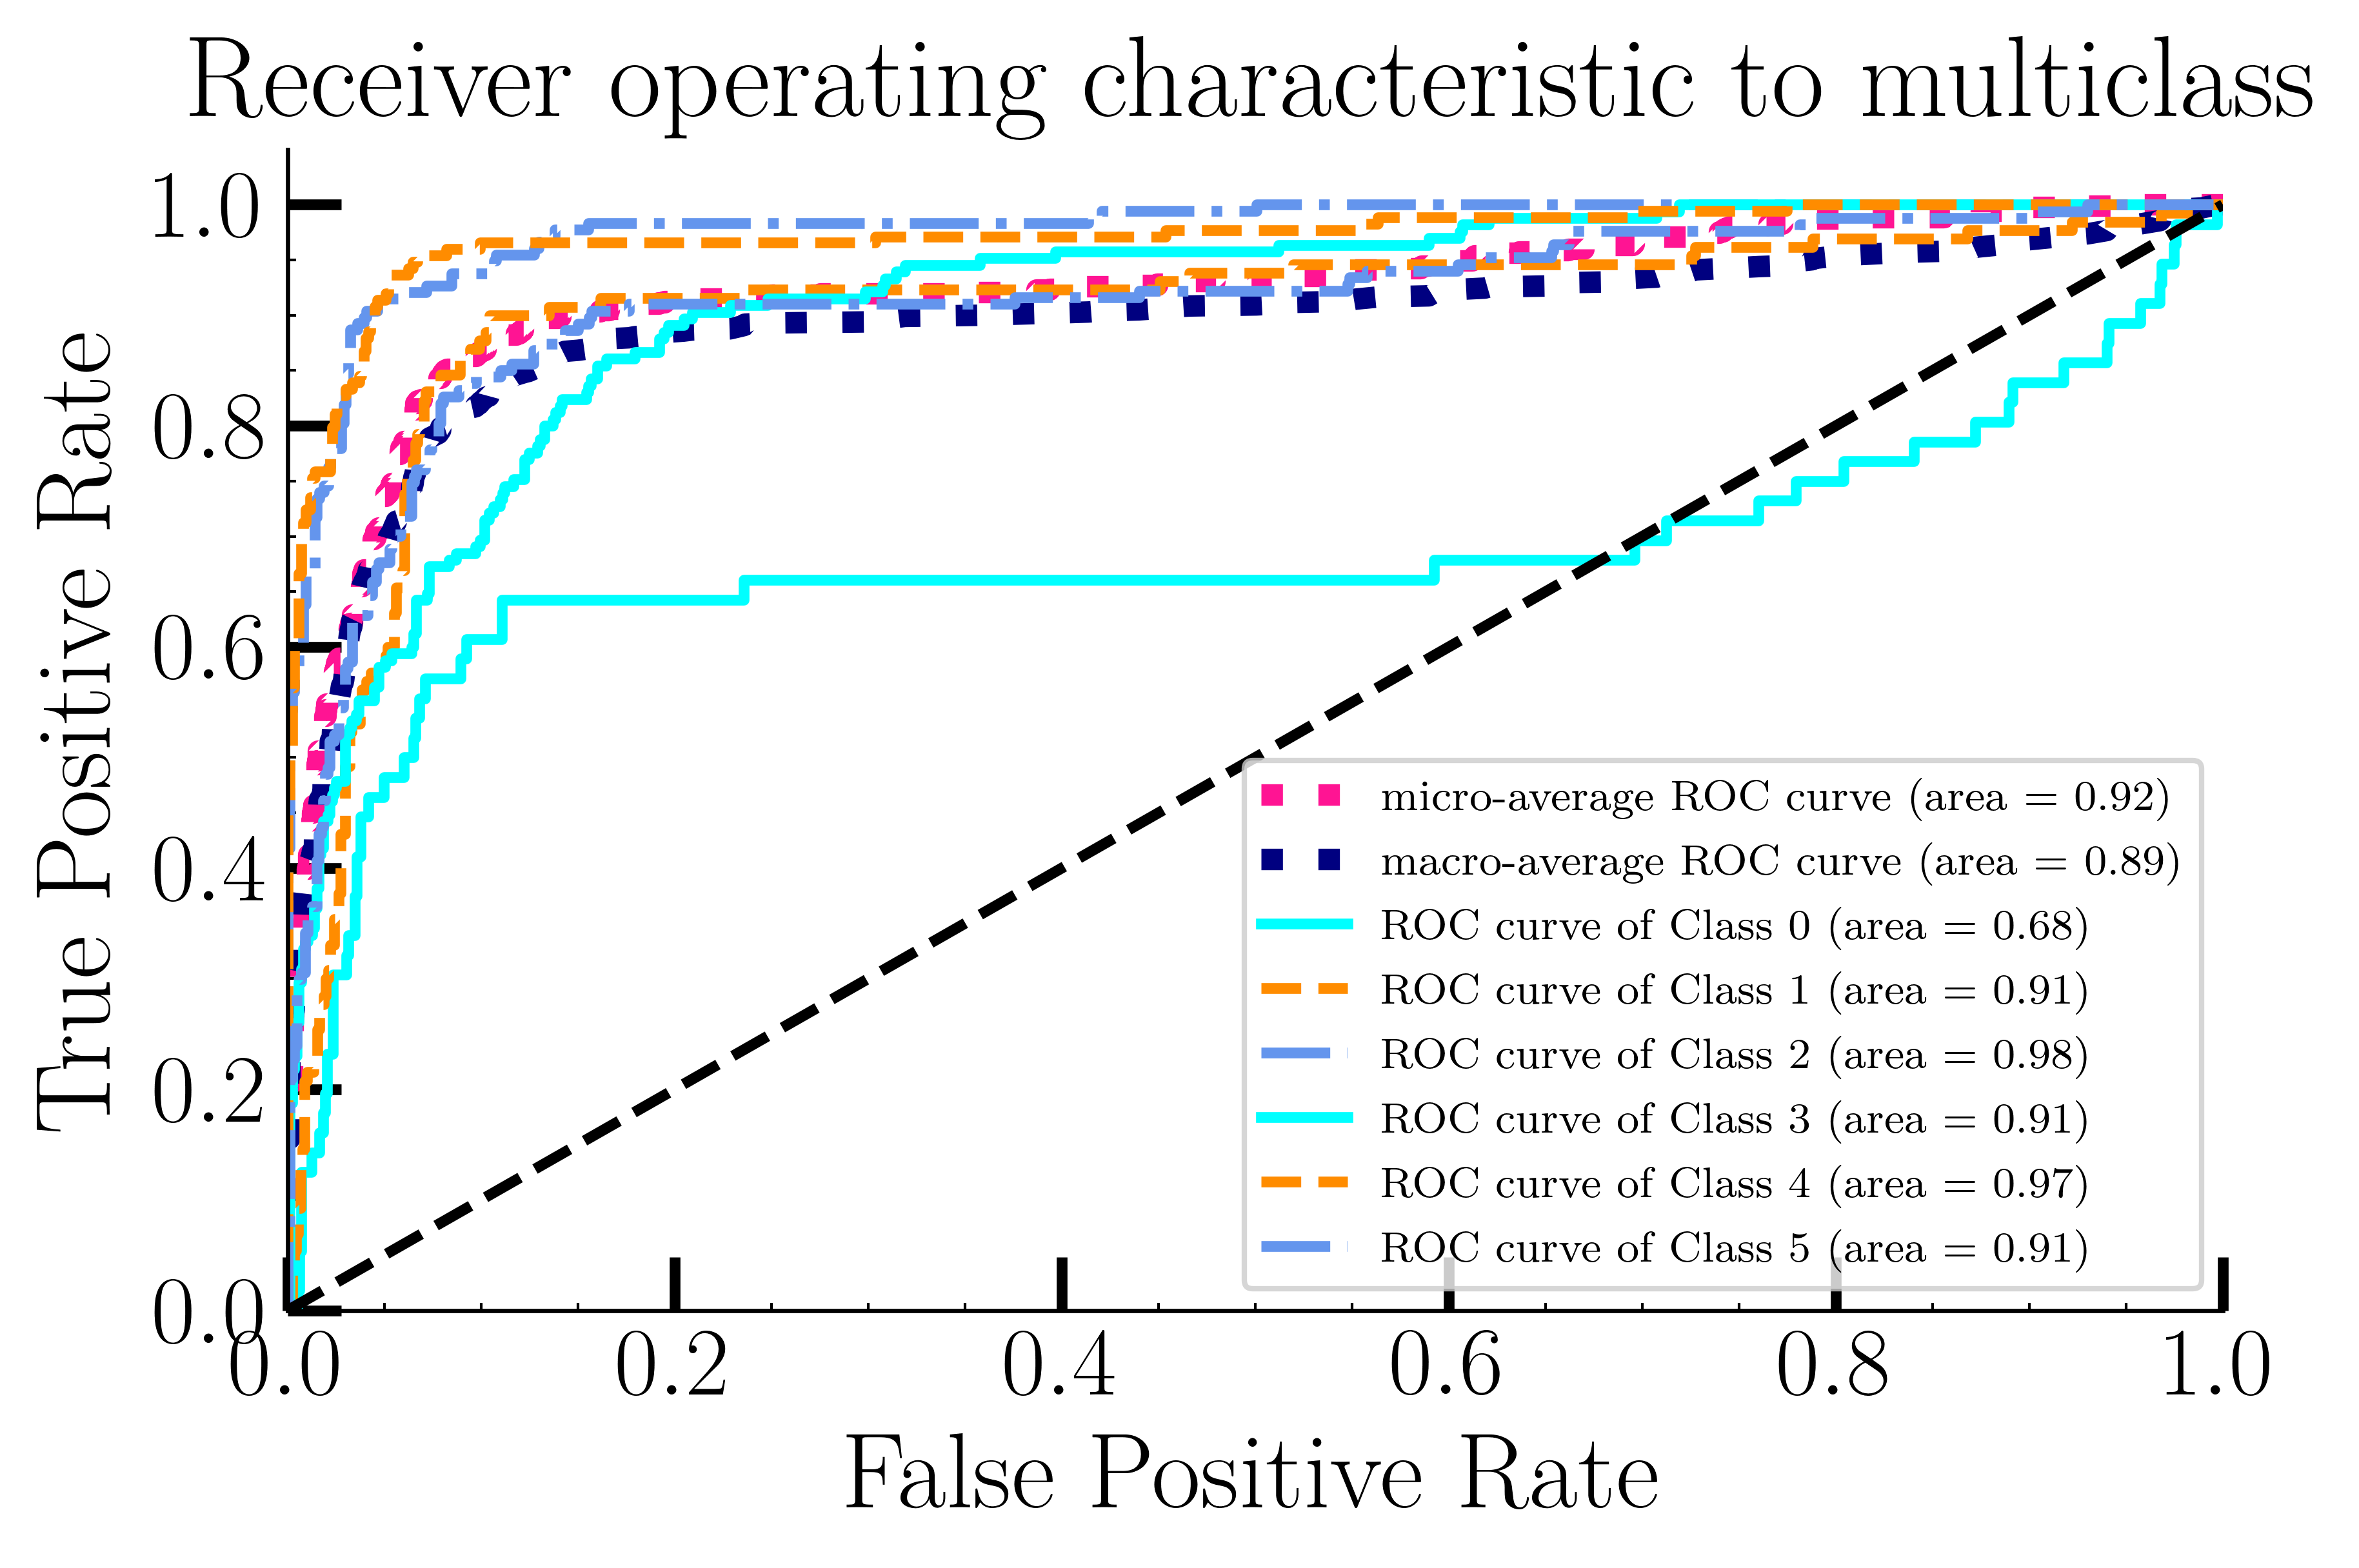

In [8]:
from itertools import cycle
plt.style.use("E:\Thesis_writting\Final_thesis_code\Plotting\\science_plot.mplstyle")
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

ax.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    ax.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of Class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

ax.plot([0, 1], [0, 1], "k--", lw=lw)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Receiver operating characteristic to multiclass")
ax.legend(loc="lower right", fontsize=8)
# plt.show()
fig.savefig(r"E:\\PPT\\Job\\Unity_sc\\"+'ROC_'+ '.png', dpi=600, transparent=False, bbox_inches='tight')